In [1]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere, plot_histogram
import qiskit.quantum_info as qi
import qiskit.circuit.library as qulib

import numpy as np
import Wavefunctions as wfs # Costumized. Need the file Wavefunctions.py in folder

from qiskit_textbook.tools import array_to_latex

In [2]:
def phase_oracle(n, indices, name = 'Uf (Oracle)'):

    Uf_arr = np.ones(2**n)                               # Array for diagonal elements of phase oracle
    
    for ind in indices:  
        Uf_arr[ind] = -1                                 # Apply phase of -1 to marked element in phase oracle

    qr_or = QuantumRegister(n)
    qc_or = QuantumCircuit(qr_or, name = name)
    qc_or = qc_or.compose(qulib.Diagonal(Uf_arr),qr_or)  # Creates efficient diagonal circuit for phase oracle

    return qc_or

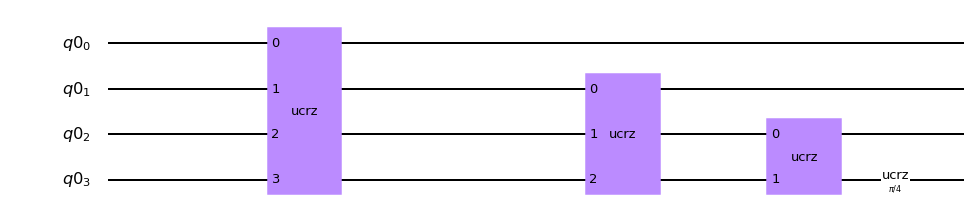

In [3]:
elems = ['1001','1100']              # Marked elements
nbits = len(str(elems[0]))           # Number of bits in element
indices =  [int(i,2) for i in elems] # List of row/column indices for each marked element

qc_po = phase_oracle(nbits,indices)
qc_po.draw('mpl')

In [5]:
U_po = qi.Operator(qc_po) # Turn qc into an operator to double-check we get the correct matrix
array_to_latex(U_po.data) # Print unitary

<IPython.core.display.Math object>

In [15]:
# h gates have been commented out to double-check the use of oracle

def diffuser(n):
    qr_dif = QuantumRegister(n)
    qc_dif = QuantumCircuit(qr_dif, name = 'V (Diffuser)')
    qc_dif.h(range(n))
    qc_dif.append(phase_oracle(n,[0]),range(n))
    qc_dif.h(range(n))
    
    return qc_dif

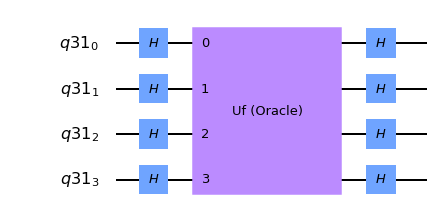

In [16]:
qc_diff = diffuser(nbits)
qc_diff.draw('mpl')

In [14]:
U_diff = qi.Operator(qc_diff) # Turn qc into an operator to double-check we get the correct matrix
array_to_latex(U_diff.data)   # Print unitary

<IPython.core.display.Math object>